In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [2]:
import seaborn as sns

# 예제 1

In [3]:
x=[2,4,6,8]
y=[81,93,91,97]
mx=np.mean(x)
my=np.mean(y)
print("x의 평균값: ",mx)
print('y의 평균값: ',my)

x의 평균값:  5.0
y의 평균값:  90.5


In [4]:
divisior=sum([(mx-i)**2 for i in x])
def top(x,mx,y,my):
    d=0
    for i in range(len(x)):
        d+=(x[i]-mx)*(y[i]-my)
    return d
dividend=top(x,mx,y,my)
print("분모: ",divisior)
print("분자: ",dividend)
    

분모:  20.0
분자:  46.0


In [5]:
a=dividend/divisior
b=my-(mx*a)
print("기울기: ",a)
print("y 절편: ",b)

기울기:  2.3
y 절편:  79.0


In [6]:
np.multiply(a,x)+b # 회귀선

array([83.6, 88.2, 92.8, 97.4])

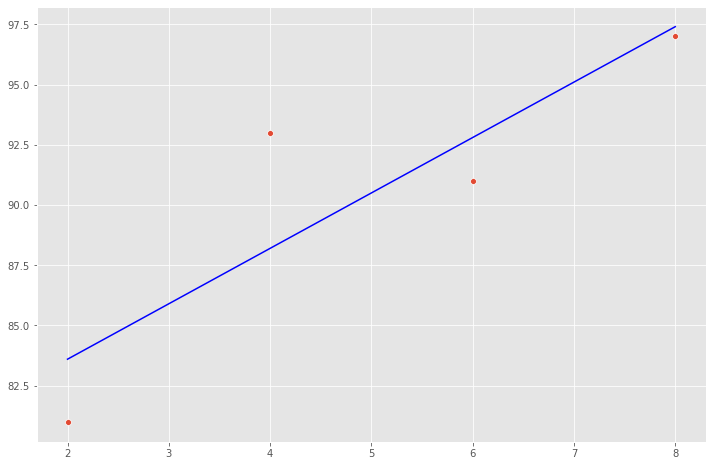

In [7]:
plt.figure(figsize=(12,8))
sns.scatterplot(x,y)
sns.lineplot(x,np.multiply(a,x)+b,color='blue')

# 예제 2

In [20]:
wb=[3,76]
data=[[2,81],[4,93],[6,91],[8,97]]
x= [i[0] for i in data]
y= [i[1] for i in data]

def predict(x):
    return wb[0]*x + wb[1]
def rmse(a,p):
    return np.sqrt(((a-p)**2).mean())
def rmse_val(predict_result,y):
    return rmse(np.array(predict_result),np.array(y))

In [21]:
predict_result=[]
for i in range(len(x)):
    predict_result.append(predict(x[i]))
    print("공부시간 :{} , 실제점수: {} , 예측점수: {}".format(x[i],y[i],predict(x[i])))
print("rmse 최종값 "+str(rmse_val(y,predict_result)))
print("기울기: a= ",wb[0])
print("y 절편: b= ",wb[1])

공부시간 :2 , 실제점수: 81 , 예측점수: 82
공부시간 :4 , 실제점수: 93 , 예측점수: 88
공부시간 :6 , 실제점수: 91 , 예측점수: 94
공부시간 :8 , 실제점수: 97 , 예측점수: 100
rmse 최종값 3.3166247903554
기울기: a=  3
y 절편: b=  76


Text(0.5, 1.0, 'first regression graph\n a=3,b=76')

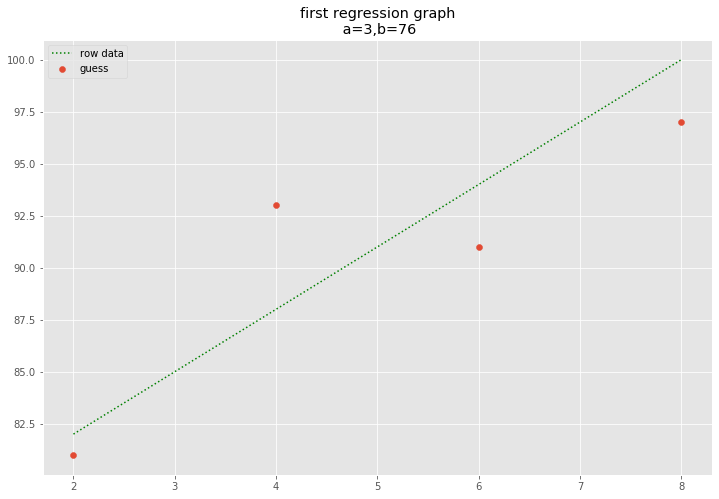

In [22]:
plt.figure(figsize=(12,8))
plt.scatter(x,y)
plt.plot(x,np.multiply(wb[0],x)+wb[1],':',color='green')
plt.legend(['row data','guess'])
plt.title("first regression graph\n a={},b={}".format(wb[0],wb[1]))

# 기울기 업뎃

In [23]:
def step_gradient(w_current,b_current,points,learning_rate):
    w_gradient=0
    b_gradient=0
    N=float(len(points))
    for i in range(len(points)):
        x=points[i][0]
        y=points[i][1]
        w_gradient+= -(2/N)*x*(y-(w_current*x+b_current))
        b_gradient+= -(2/N)*(y-(w_current*x+b_current))
    new_w = w_current-(learning_rate*w_gradient)
    new_b = b_current-(learning_rate*b_current)
    return [new_w,new_b]

In [39]:
learning_rate=0.01

In [40]:
data

[[2, 81], [4, 93], [6, 91], [8, 97]]

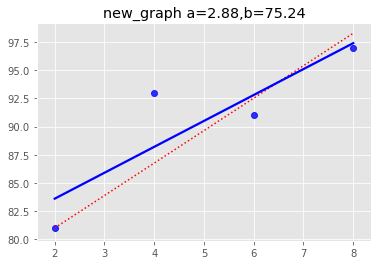

In [41]:
w=step_gradient(wb[0],wb[1],data,learning_rate)
plt.plot(x,np.multiply(w[0],x)+w[1],':',color='red')
sns.regplot(x,y,color='blue',ci=False)
plt.title('new_graph a={},b={}'.format(w[0],w[1]))
plt.show()


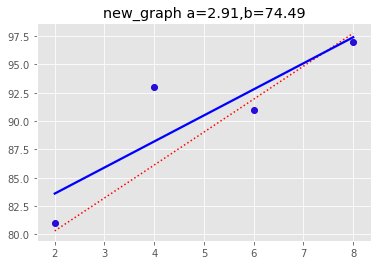

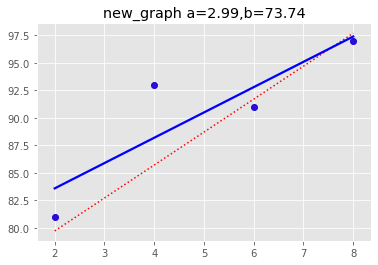

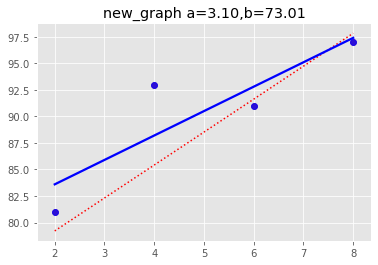

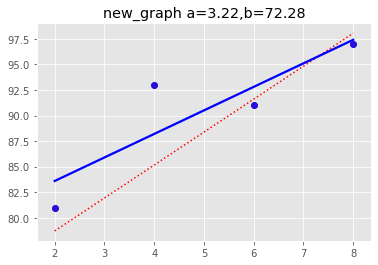

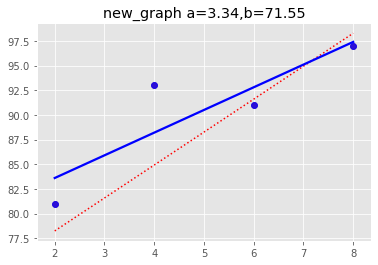

In [42]:
for i in range(5):
    new_w=step_gradient(w[0],w[1],data,learning_rate)
    w[0]=new_w[0]
    w[1] = new_w[1]
    plt.scatter(x,y)
    plt.plot(x,np.multiply(w[0],x)+w[1],':',color='red')
    sns.regplot(x,y,color='blue',ci=False)
    plt.title('new_graph a=%.2f,b=%.2f'%(w[0],w[1]))
    plt.show()
    

# 반복을 주지 않고 한 번만 실행하는게 가장 최적점이다.